In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
pd.set_option("display.max_columns", 30)

In [12]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test1.csv')

In [13]:
train.head()

,sid,label,package,version,ad_id,media_id,apptype,timestamp,ip,city,province,reqrealip,android_id,imei,idfa,udid,macmd5,dev_type,ntt,carrier,os,osv,orientation,lan,dev_height,dev_width,dev_ppi
0,1438873,1,18,8.5.6.0,91,104,1199,1.559893e+12,139.207.65.127,成都市,-1.0,124.243.219.138,316361,20199,0,0,4c7e1e83cfb6e41b0bbf90d0b8ae2cf0,2.0,6.0,46000.0,android,9,0.0,NaN,0.0,0.0,0.0
1,1185582,1,0,4.7.5,139,19,893,1.559994e+12,124.160.214.165,杭州市,-1.0,47.101.193.170,135939,179776,0,0,empty,2.0,6.0,0.0,android,8.1,0.0,NaN,0.0,0.0,0.0
2,1555716,1,0,NaN,507,559,821,1.559837e+12,117.136.4.83,长治市,-1.0,59.110.124.37,399254,527991,0,0,empty,2.0,0.0,0.0,android,8.1.0,0.0,NaN,760.0,360.0,0.0
3,1093419,0,0,149,573,129,1004,1.560042e+12,113.64.88.212,梅州市,-1.0,47.96.133.76,68983,91211,0,0,e83d8ac19eb5dc85835a3695b78d6b44,2.0,2.0,46000.0,android,8.1.0,0.0,NaN,2214.0,1080.0,0.0
4,1400089,1,0,5.76.2.6060,243,64,1076,1.559867e+12,39.190.239.140,宁波市,-1.0,47.100.11.90,288999,382846,0,0,0f607264fc6318a92b9e13c65db7cd3c,2.0,2.0,46000.0,android,8.0.0,0.0,zh-CN,2280.0,1080.0,0.0


In [25]:
explore_train = train.drop(['version', 'ip', 'city', 'reqrealip', 'macmd5', 'os', 'osv', 'lan'], axis = 1)

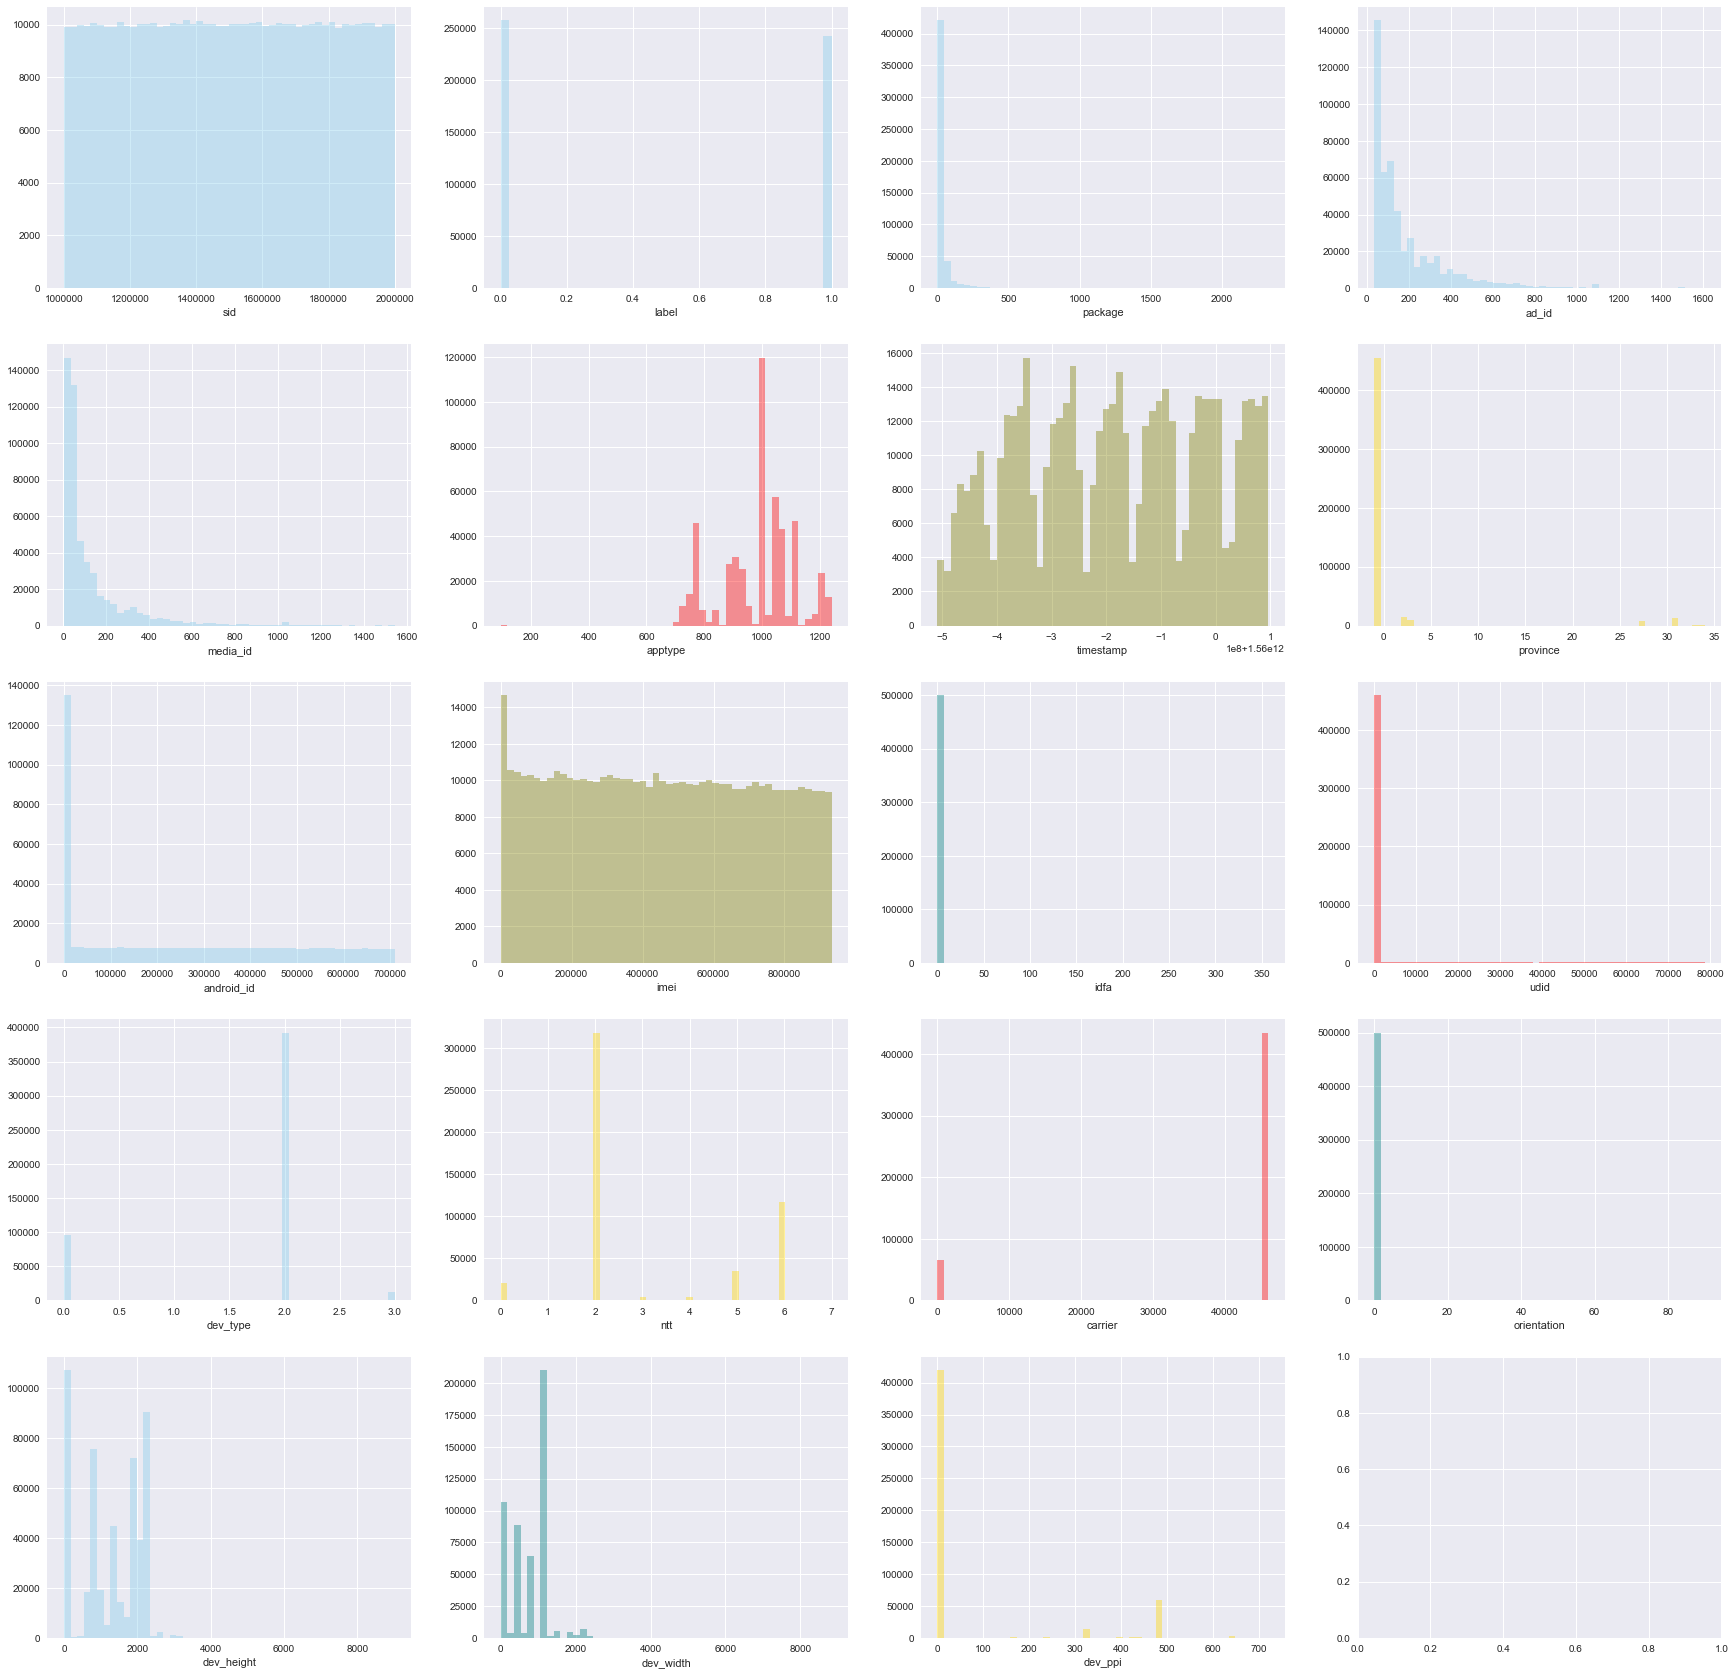

In [52]:
f, axes = plt.subplots(5, 4, figsize=(30, 30), sharex=False)
colors = ["skyblue", "red", "olive", "gold", "teal"]
j, i = (0, 0)
for col in explore_train.columns:
    sns.distplot(explore_train[col] , kde=False, rug = False, ax = axes[i, j], color=colors[(i * j)%len(colors)])
    j += 1
    if j == 4:
        i += 1
    i = i%5
    j = j%4

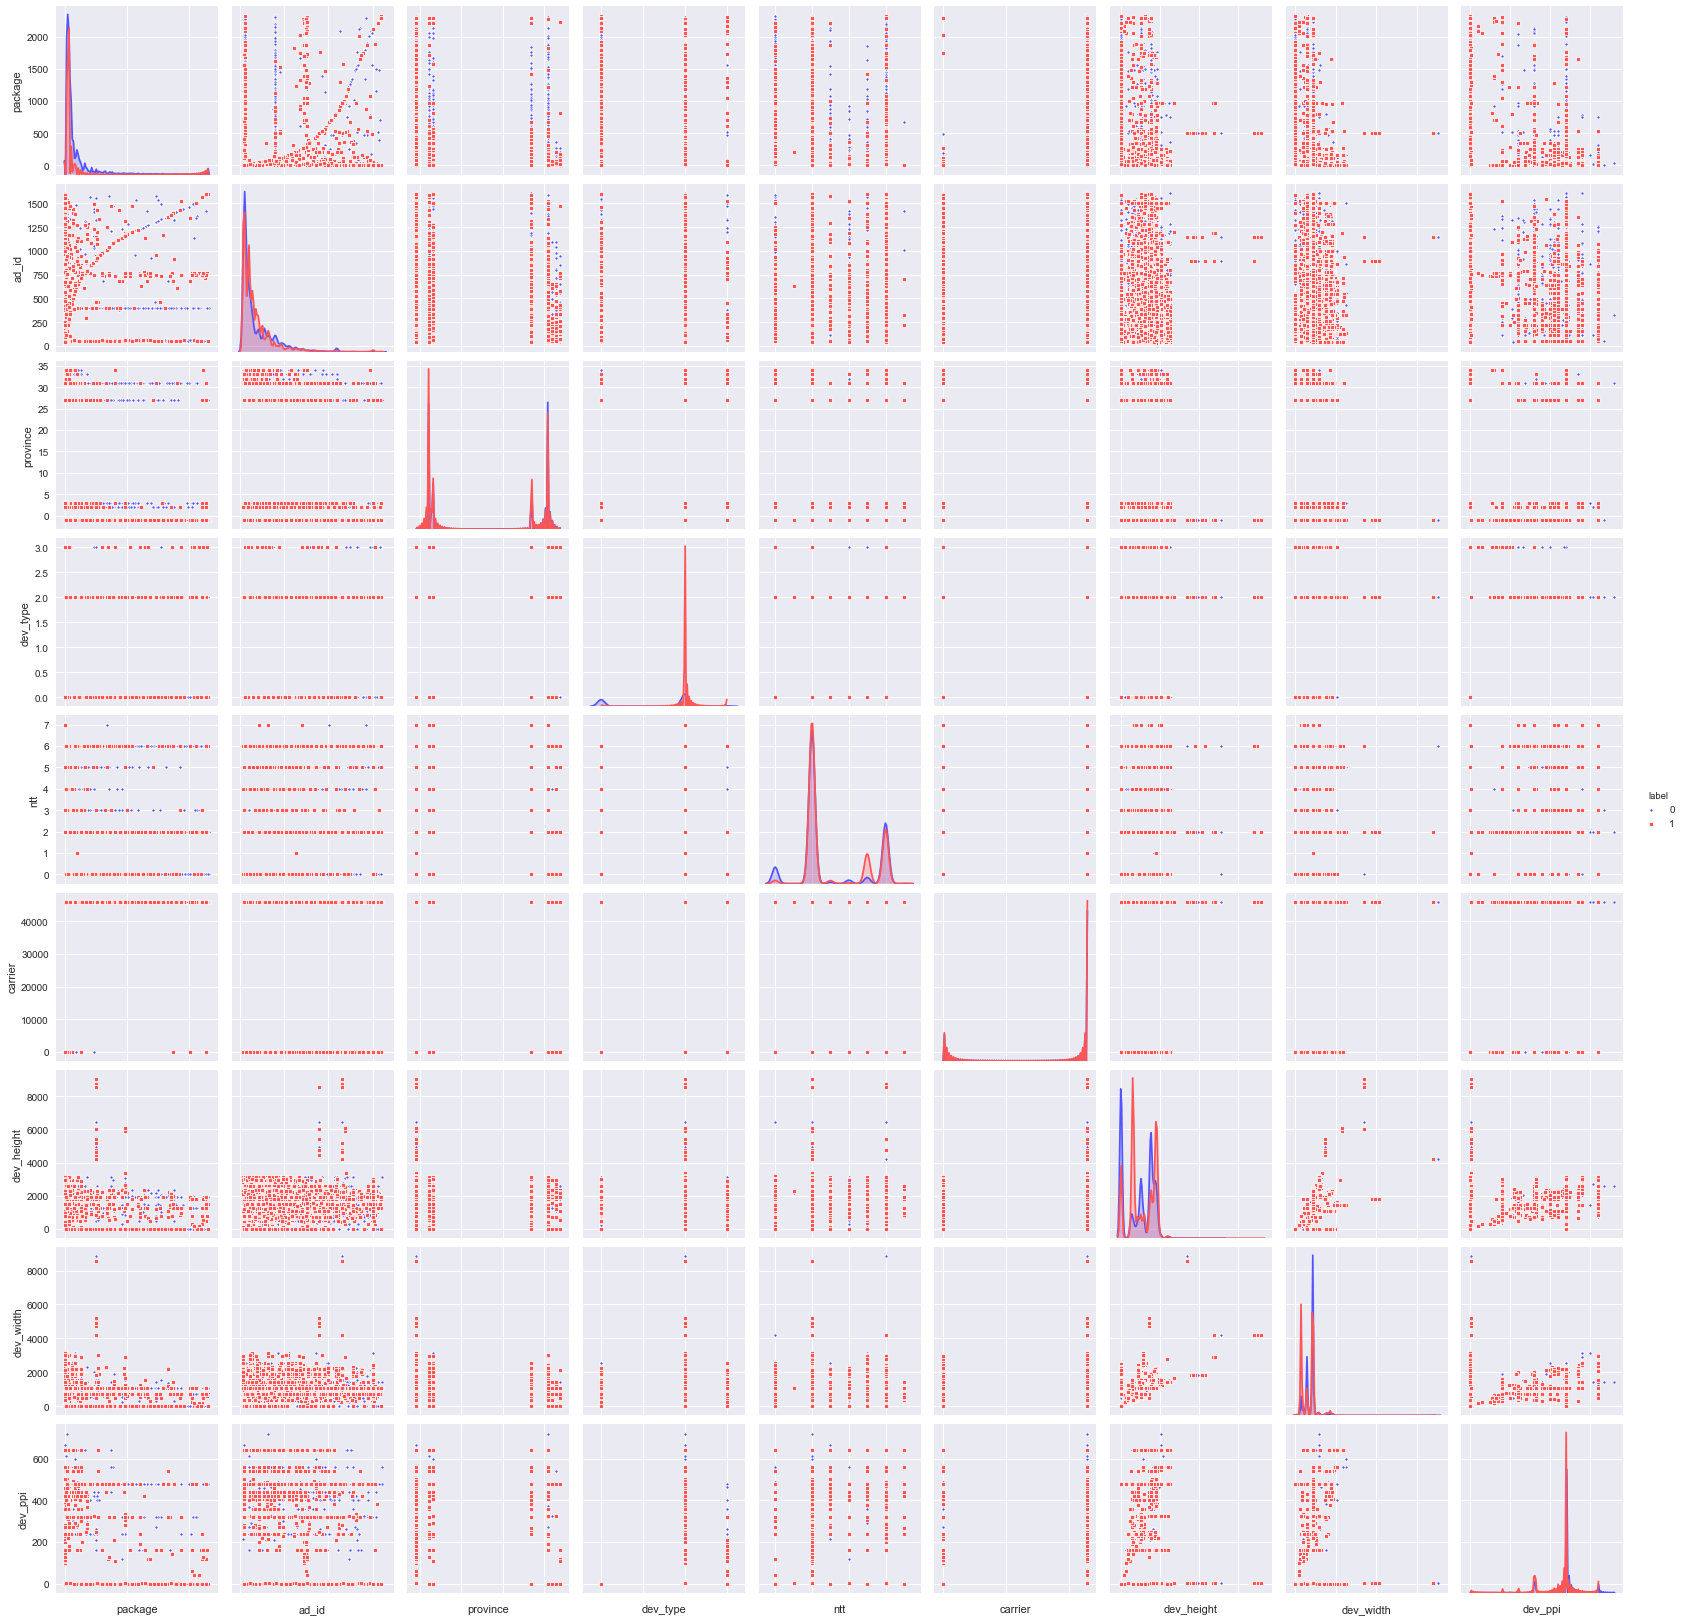

In [72]:
g = sns.pairplot(explore_train[['label', 'package', 'ad_id', 'province', 'dev_type', 'ntt', 'carrier', 'dev_height', 'dev_width', 'dev_ppi']], 
                hue = 'label', palette = 'seismic', diag_kind="kde", markers=['o', 's'], diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

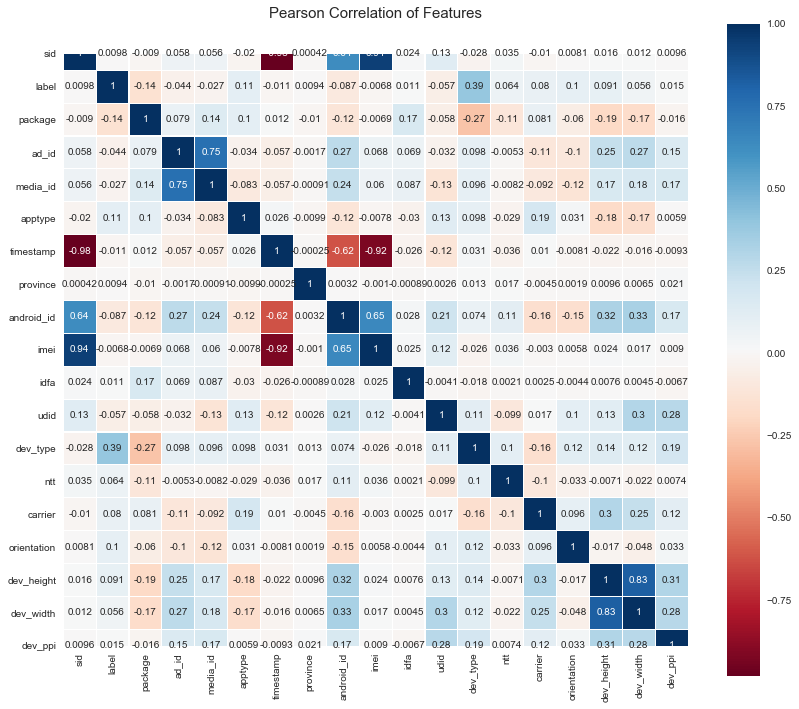

In [74]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(explore_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [4]:
train.columns

Index(['sid', 'label', 'package', 'version', 'ad_id', 'media_id', 'apptype',
       'timestamp', 'ip', 'city', 'province', 'reqrealip', 'android_id',
       'imei', 'idfa', 'udid', 'macmd5', 'dev_type', 'ntt', 'carrier', 'os',
       'osv', 'orientation', 'lan', 'dev_height', 'dev_width', 'dev_ppi'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 27 columns):
sid            500000 non-null int64
label          500000 non-null int64
package        500000 non-null int64
version        339585 non-null object
ad_id          500000 non-null int64
media_id       500000 non-null int64
apptype        500000 non-null int64
timestamp      500000 non-null float64
ip             500000 non-null object
city           492376 non-null object
province       500000 non-null float64
reqrealip      500000 non-null object
android_id     500000 non-null int64
imei           500000 non-null int64
idfa           500000 non-null int64
udid           500000 non-null int64
macmd5         500000 non-null object
dev_type       500000 non-null float64
ntt            500000 non-null float64
carrier        500000 non-null float64
os             500000 non-null object
osv            493439 non-null object
orientation    500000 non-null float64
lan            3167

In [ ]:
test.insert(1, 'label', 0)

In [67]:
explore_test = test.drop(['version', 'ip', 'city', 'reqrealip', 'macmd5', 'os', 'osv', 'lan'], axis = 1)

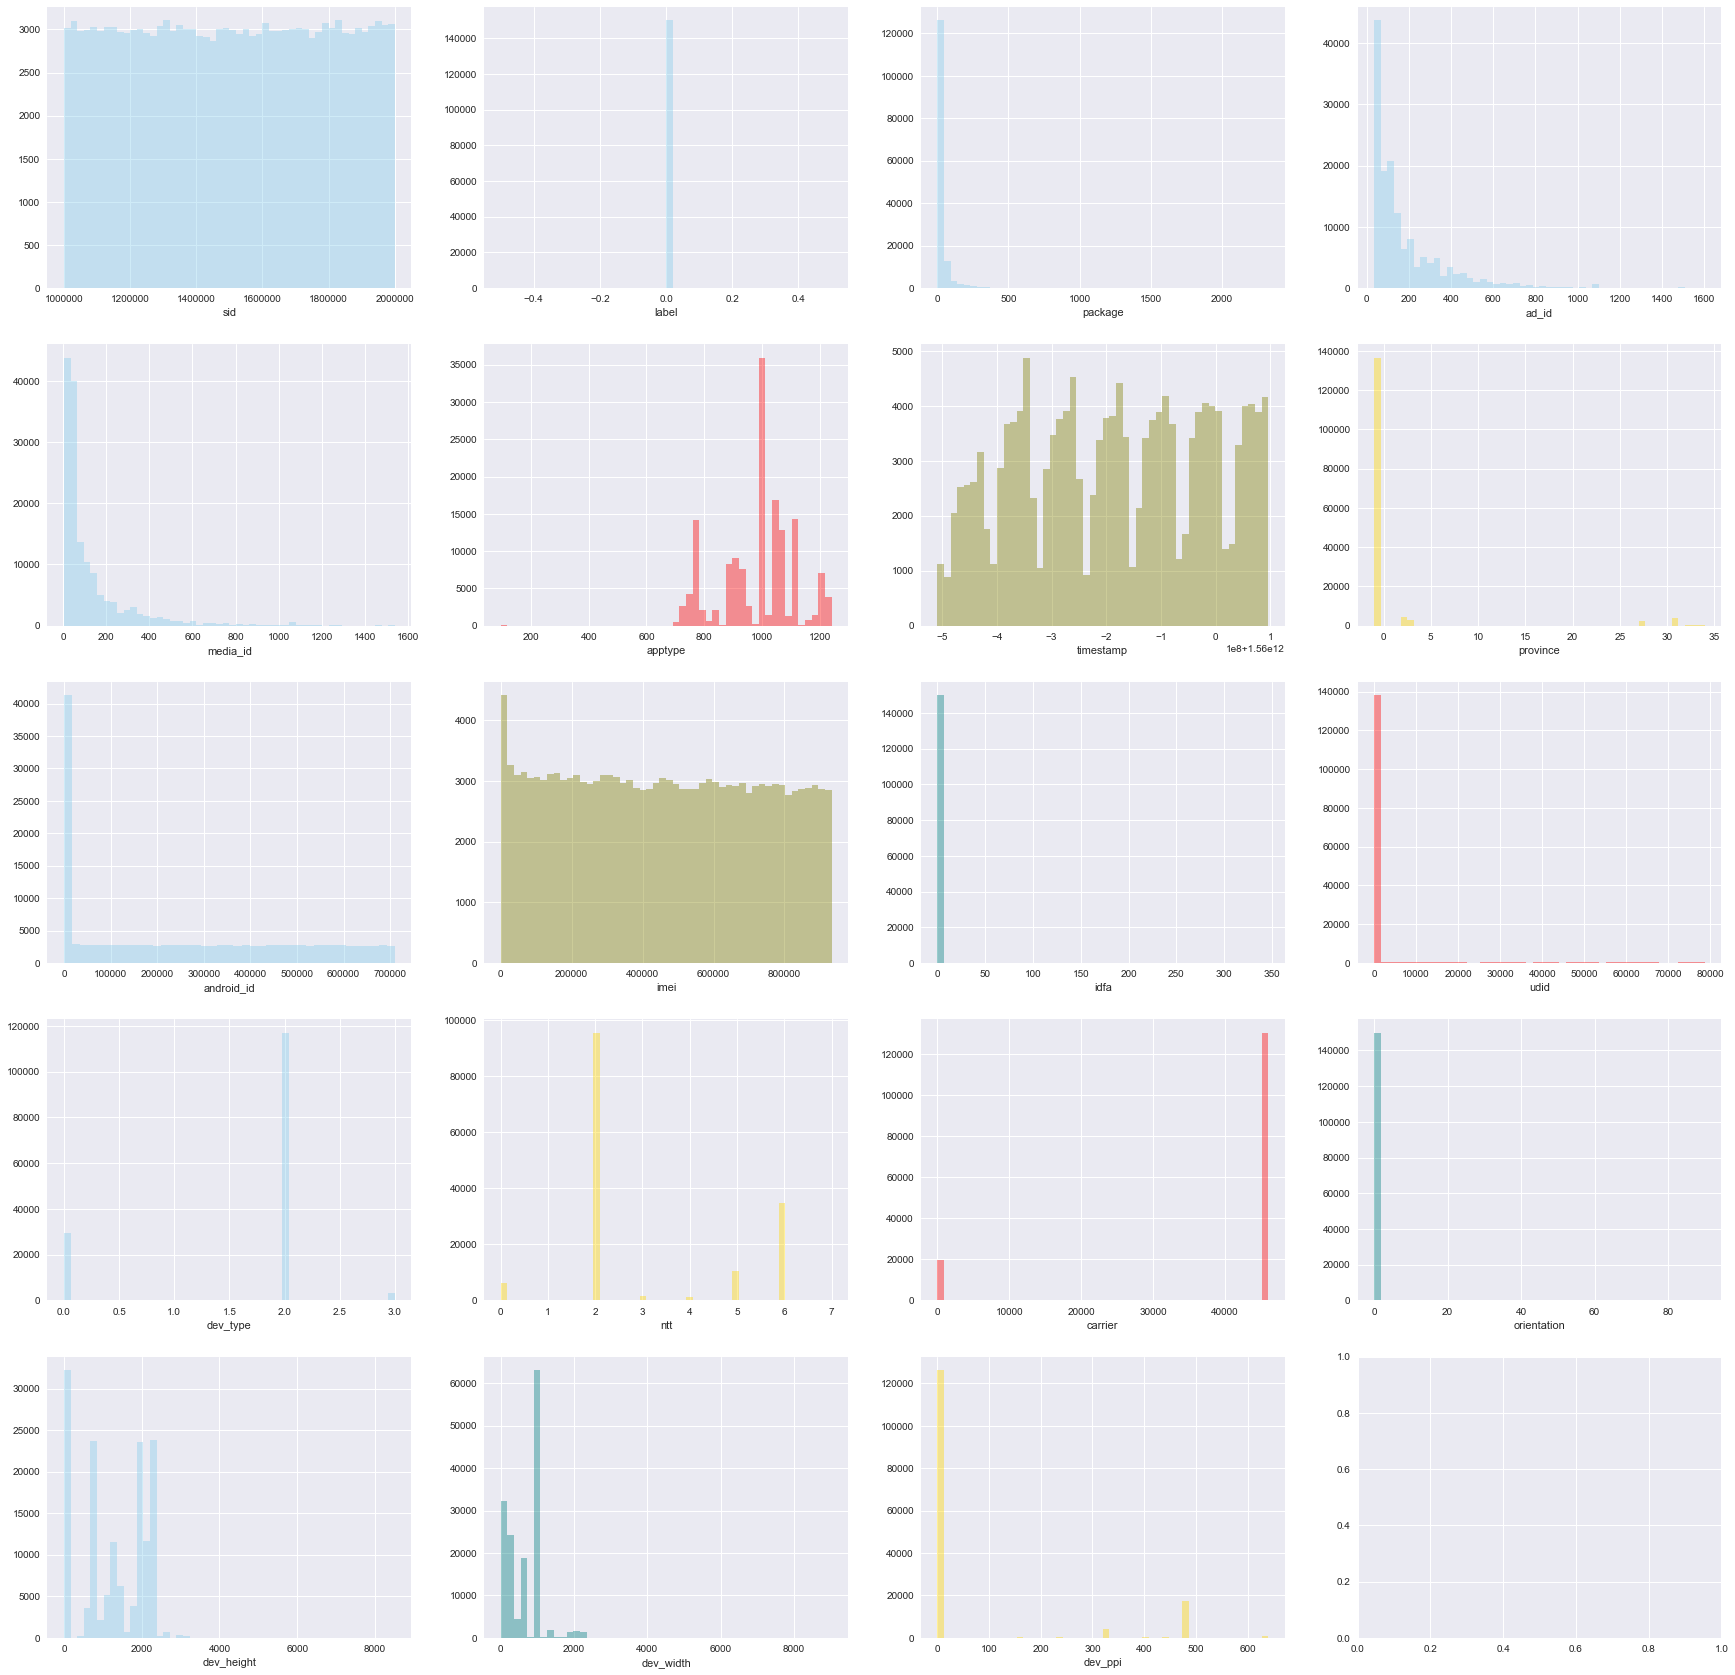

In [68]:
f, axes = plt.subplots(5, 4, figsize=(30, 30), sharex=False)
colors = ["skyblue", "red", "olive", "gold", "teal"]
j, i = (0, 0)
for col in explore_test.columns:
    sns.distplot(explore_test[col] , kde=False, rug = False, ax = axes[i, j], color=colors[(i * j)%len(colors)])
    j += 1
    if j == 4:
        i += 1
    i = i%5
    j = j%4